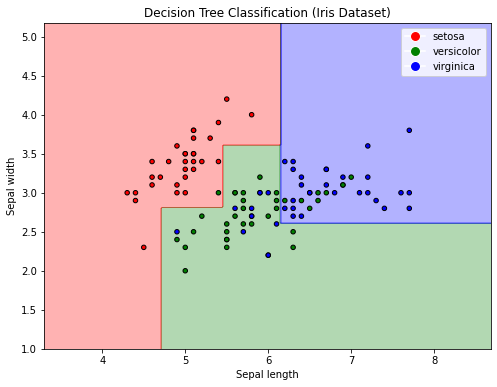

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Take only the first two features for visualization purposes
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree model
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Define the decision boundary function
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))

    # Plot the training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    # Create custom legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=iris.target_names[i],
                          markerfacecolor=c, markersize=10) for i, c in enumerate(['red', 'green', 'blue'])]
    plt.legend(handles=handles)
    plt.title('Decision Tree Classification (Iris Dataset)')

# Visualize the decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(clf, X_train, y_train)
plt.show()


In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 1:4]  # Take the first three features for 3D visualization (Sepal length, Sepal width, Petal length)
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree model
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Define a function to create a decision boundary grid for 3D
def create_3d_decision_boundary(clf, X):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    
    xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.2),
                             np.arange(y_min, y_max, 0.2),
                             np.arange(z_min, z_max, 0.2))
    
    # Predict for each point in the 3D grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
    Z = Z.reshape(xx.shape)
    
    return xx, yy, zz, Z

# Create the decision boundary
xx, yy, zz, Z = create_3d_decision_boundary(clf, X_train)

# Create 3D scatter plot with Plotly
fig = go.Figure()

# Plot the actual data points in 3D
for i, color in zip(range(3), ['red', 'green', 'blue']):
    fig.add_trace(go.Scatter3d(
        x=X_train[y_train == i, 0],
        y=X_train[y_train == i, 1],
        z=X_train[y_train == i, 2],
        mode='markers',
        marker=dict(size=5, color=color, opacity=0.8),
        name=iris.target_names[i]
    ))

# Plot decision boundary surfaces
fig.add_trace(go.Volume(
    x=xx.ravel(), y=yy.ravel(), z=zz.ravel(),
    value=Z.ravel(),
    isomin=0, isomax=2,  # There are 3 classes (0, 1, 2)
    opacity=0.1,  # Make boundary surfaces semi-transparent
    surface_count=3,  # Define surfaces for each class
    colorscale=[[0, 'red'], [0.5, 'green'], [1, 'blue']],
    showscale=False
))

# Labels and layout
fig.update_layout(
    scene=dict(
        xaxis_title='Sepal Length',
        yaxis_title='Sepal Width',
        zaxis_title='Petal Length'
    ),
    title="3D Decision Tree Classification (Iris Dataset)",
)

# Show the figure
fig.show()
